# Studi Perbandingan Paket Prabayar: Surf vs. Ultimate di Perusahaan Megaline <a id='intro'></a>

Seorang analis di perusahaan operator telekomunikasi `Megaline` diminta oleh perusahaan tersebut menganalisis dua jenis paket prabayar, yaitu paket `Surf` dan paket `Ultimate`. Departemen periklanan perusahaan tersebut ingin mengetahui paket prabayar mana yang menghasilkan lebih banyak pendapatan, sehingga mereka bisa membuat anggaran iklan yang sesuai.

Kita akan melakukan analisis awal untuk paket-paket prabayar tersebut berdasarkan sampel klien yang berukuran relatif kecil. kita memiliki 500 data klien `Megaline`, yang berisi informasi seperti: siapa mereka, dari mana asalnya, jenis paket apa yang mereka gunakan, serta jumlah panggilan dan pesan yang mereka kirim di tahun 2018. Tugas kita adalah untuk menganalisis perilaku para pengguna, lalu menentukan paket prabayar manakah yang lebih menguntungkan bagi perusahaan `Megaline`.

Dataset yang dimiliki perusahaan `Megaline` diantaranya berisi `'calls'`, `'internet'`, `'messages'`, `'plans'` dan `'users'`yang semuanya memiliki informasi yang penting untuk analisis projek ini. Tujuan dari projek ini adalah selain untuk mencari pendapatan terbanyak dari kedua paket prabayar tersebut namun juga menganalisis prilaku pengguna seperti `durasi telepon`, `jumlah sms` dan `jumlah penggunaan data internet` terhadap kedua paket prabayar tersebut. Beberapa hipotesis diajukan sebagai berikut:
- Benarkah untuk kategori `durasi telepon` terbanyak dalam satu bulan dimiliki oleh `Paket Surf`?
- Benarkah untuk kategori `jumlah sms` terbanyak dalam satu bulan dimiliki oleh `Paket Surf`?
- Benarkah rata-rata penggunaan jumlah data internet per bulan untuk kedua tipe `Paket Prabayar` berkisar `16 GB`?
- Benarkah jumlah pendapatan terbanyak dari pengguna per bulan dimiliki oleh `Paket Ultimate`?
- Benarkah Pendapatan Rata-rata dari Pengguna Paket Prabayar Ultimate dan Surf Berbeda?
- Benarkah Pendapatan Rata-rata dari Pengguna di Wilayah NY-NJ dengan Wilayah Lain adalah Berbeda?

# Konten <a id='back'></a>

* [Pendahuluan](#intro)
* [Tahap 1. Inisialisasi](#cont_1)
* [Tahap 2. Memuat Data](#cont_2)
* [Tahap 3. Mempersiapkan Data](#cont_3)
    * [3.1 Paket Prabayar](#cont_4) 
    * [3.2 Pengguna](#cont_5) 
        * [3.2.1 Memperbaiki Data](#cont_6) 
        * [3.2.2 Memperkaya Kualitas Data](#cont_7) 
    * [3.3 Panggilan](#cont_8) 
        * [3.3.1 Memperbaiki Data](#cont_9) 
        * [3.3.2 Memperkaya Kualitas Data](#cont_10) 
    * [3.4 Pesan/SMS](#cont_11) 
        * [3.4.1 Memperbaiki Data](#cont_12) 
        * [3.4.2 Memperkaya Kualitas Data](#cont_13) 
    * [3.5 Internet](#cont_14) 
        * [3.5.1 Memperbaiki Data](#cont_15) 
        * [3.5.2 Memperkaya Kualitas Data](#cont_16) 
* [Tahap 4. Mempelajari Syarat dan Kondisi Terkait Paket Prabayar](#cont_17)
* [Tahap 5. Mengagregasi Data per Pengguna](#cont_18)
* [Tahap 6. Mempelajari Perilaku Pengguna](#cont_19)
    * [6.1 Panggilan](#cont_20)
    * [6.2 Pesan/SMS](#cont_21)
    * [6.3 Internet](#cont_22)
* [Tahap 7. Pendapatan](#cont_23)
* [Tahap 8. Menguji Hipotesis Statistik](#cont_24)
    * [8.1 Pengujian Hipotesis 1: Pendapatan Rata-rata dari Pengguna Paket Prabayar Ultimate dan Surf Berbeda](#cont_25)
    * [8.2 Pengujian Hipotesis 2: Pendapatan Rata-rata dari Pengguna di Wilayah NY-NJ Berbeda dengan Pendapatan Pengguna dari Wilayah Lain](#cont_26)
* [Tahap 9. Kesimpulan Umum](#cont_27)

## Inisialisasi <a id= 'cont_1' ></a>

Beberapa library yang dipakai untuk menyelesaikan projek ini yaitu `pandas`, `numpy`, `matplotlib`, `seaborn`, `math` dan `scypi` dengan penjelasan di dalamnya.

In [1]:
# memuat semua library
import pandas as pd # memproses dataframe
import numpy as np # memproses statistik deskriptif
import matplotlib.pyplot as plt # memvisualisasikan data
import seaborn as sns # memvisualisasikan data
import math as mt # menambahkan fungsi matematika
from scipy import stats as st # memproses hipotesis

# set tema seaborn
sns.set_theme(palette='bright')

## Memuat Data <a id= 'cont_2' ></a>

Megaline membagi data berdasarkan kelompoknya kedalam beberapa kelompok diantranya: `calls`, `internet`, `messages`, `plans` dan `users`. Sekarang kita akan memuatnya kedalam `notebook`.

In [2]:
# memuat file data ke dalam DataFrame yang berbeda
calls = pd.read_csv('megaline_calls.csv')
internet = pd.read_csv('megaline_internet.csv')
messages = pd.read_csv('megaline_messages.csv')
plans = pd.read_csv('megaline_plans.csv')
users = pd.read_csv('megaline_users.csv')

## Mempersiapkan Data <a id= 'cont_3' ></a>

Selanjutnya mari kita persiapkan datanya mulai dari pengecekan `tipe data`, `duplikat`, `nilai kosong` serta menambahkan beberapa kolom tambahan untuk memudahkan analisis.

## Paket Prabayar <a id= 'cont_4' ></a>

Kita akan menampilkan informasi dari kelompok data `plans` sebagai berikut:

In [3]:
# menampilkan informasi/rangkuman umum tentang DataFrame paket-paket prabayar
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [4]:
# menampilkan sampel data untuk paket-paket tersebut
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Dari informasi diatas menampilkan bahwa data sudah cukup baik seperti `tipe data`, `duplikat`, `nilai hilang` dan informasi lainya sehingga tidak diperlukan perbaikan pada data. 

## Pengguna <a id= 'cont_5' ></a>

In [5]:
# menampilkan informasi/rangkuman umum tentang DataFrame pengguna
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [6]:
# menampilkan sampel data pengguna
users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN


In [7]:
# mengecek duplikat data `users`
users.duplicated().sum()

0

Dari pengecekan diatas terlihat bahwa ada `tipe data yang salah` dan `terdapat nilai yang hilang`. Selanjutnya adalah perbaikan untuk masalah-masalah tersebut.

### Memperbaiki Data <a id= 'cont_6' ></a>

Mengubah tipe data yang salah dari tipe `objek` menjadi `datetime`.

In [8]:
# memperbaiki tipe data yang salah pada kolom tanggal
# merubah tipe data `objek` menjadi `datetime`
users['reg_date'] = pd.to_datetime(users['reg_date'], format = '%Y-%m-%d')

# menampilkan informasi `users`
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


Data tipe pada kolom `reg_date` sudah menjadi tipe data `datetime`.

Selanjutnya mengisi nilai yang hilang pada kolom `churn_date`. Dikarenakan nilai yang hilang merupakan nasabah yang masih aktif hingga saat ini dan tanggal tercatat hanya sepanjang tahun 2018. Maka kita isi nilai tersebut dengan tanggal `2018-12-31`. Kemudian kita lanjutkan dengan mengubah tipe datanya ke `date_time`.

In [9]:
# mengisi nilai yang hilang 
users['churn_date'].fillna('2018-12-31', inplace = True)

# mengubah tipe data `churn_date` menjadi `datetime`
users['churn_date'] = pd.to_datetime(users['churn_date'], format = '%Y-%m-%d')

# menampilkan informasi `users`
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  500 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


Tipe data yang salah dan nilai yang hilang sudah diperbaiki.

### Memperkaya Kualitas Data <a id= 'cont_7' ></a>

Selanjutnya untuk memudahkan analisis, diperlukan beberapa kolom tambahan seperti memisahkan `datetime` berdasarkan `tanggal`, `bulan`, `tahun`. Kemudian dilanjutkan pembuatan kolom `region` yang berisi apakah kota berasal dari wilayah `'NY-NJ'` atau bukan `'other'`.

In [10]:
# memisahkan kolom datetime

# membuat kolom tanggal
users['date'] = users['reg_date'].dt.day

# membuat kolom bulan
users['month'] = users['reg_date'].dt.month

# membuat kolom tahun
users['year'] = users['reg_date'].dt.year

# menampilkan sampel data
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,date,month,year
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2018-12-31,24,12,2018
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018-12-31,13,8,2018
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,2018-12-31,21,10,2018
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,2018-12-31,28,1,2018
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,2018-12-31,23,5,2018


In [11]:
# membuat kolom untuk memisahkan region NY-NJ dari region lain
# mengecek nilai unik pada kolom `city`
users['city'].unique()

array(['Atlanta-Sandy Springs-Roswell, GA MSA',
       'Seattle-Tacoma-Bellevue, WA MSA',
       'Las Vegas-Henderson-Paradise, NV MSA', 'Tulsa, OK MSA',
       'Dallas-Fort Worth-Arlington, TX MSA',
       'San Francisco-Oakland-Berkeley, CA MSA',
       'Grand Rapids-Kentwood, MI MSA',
       'Orlando-Kissimmee-Sanford, FL MSA',
       'San Jose-Sunnyvale-Santa Clara, CA MSA',
       'Cleveland-Elyria, OH MSA',
       'Chicago-Naperville-Elgin, IL-IN-WI MSA', 'Knoxville, TN MSA',
       'New York-Newark-Jersey City, NY-NJ-PA MSA', 'Pittsburgh, PA MSA',
       'Fresno, CA MSA',
       'Washington-Arlington-Alexandria, DC-VA-MD-WV MSA',
       'Indianapolis-Carmel-Anderson, IN MSA', 'Jacksonville, FL MSA',
       'Los Angeles-Long Beach-Anaheim, CA MSA',
       'Omaha-Council Bluffs, NE-IA MSA',
       'Houston-The Woodlands-Sugar Land, TX MSA',
       'Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA',
       'Tampa-St. Petersburg-Clearwater, FL MSA',
       'Birmingham-Hoover, AL MSA'

In [12]:
# membuat kolom region NY-NJ

# membuat fungsi pengecekan apakah berasal dari region `NY-NJ` atau bukan
def split_region(data):
    if ('NY-NJ' in data)|(data == 'NY')|(data == 'NJ'):
        return 'NY-NJ'
    else:
        return 'other'

# membuat kolom region menggunakan fungsi yang sudah dibuat
users['region'] = users['city'].apply(split_region)

# menampilkan value_counts dari kolom `region`
users['region'].value_counts()

region
other    420
NY-NJ     80
Name: count, dtype: int64

Kolom-kolom tambahan sudah terbuat dan sesuai yang diharapkan.

## Panggilan <a id= 'cont_8' ></a>

In [13]:
# menampilkan informasi/rangkuman umum tentang DataFrame panggilan
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [14]:
# mengecek apakah terdapat duplikat didalam dataset
calls.duplicated().sum()

0

In [15]:
# menampilkan sampel data berisi panggilan
calls

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37


Dari pengecekan diatas terlihat bahwa ada `tipe data yang salah`. Selanjutnya adalah perbaikan untuk masalah tersebut. 

### Memperbaiki Data <a id= 'cont_9' ></a>

Mengganti tipe data yang salah dari tipe `objek` menjadi `datetime`.

In [16]:
# mengganti tipe data `objek` menjadi tipe `datetime`
calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d')

# menampilkan informasi data
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


Tipe data pada `call_date` sudah diperbaiki menjadi tipe `datetime`.

### Memperkaya Kualitas Data <a id= 'cont_10' ></a>

Selanjutnya untuk memudahkan analisis, diperlukan beberapa kolom tambahan seperti memisahkan `datetime` berdasarkan `tanggal`, `bulan`, `tahun`.

In [17]:
# memisahkan kolom datetime

# membuat kolom tanggal
calls['date'] = calls['call_date'].dt.day

# membuat kolom bulan
calls['month'] = calls['call_date'].dt.month

# membuat kolom tahun
calls['year'] = calls['call_date'].dt.year

# menampilkan sampel data
calls.head()

,id,user_id,call_date,duration,date,month,year
0,1000_93,1000,2018-12-27,8.52,27,12,2018
1,1000_145,1000,2018-12-27,13.66,27,12,2018
2,1000_247,1000,2018-12-27,14.48,27,12,2018
3,1000_309,1000,2018-12-28,5.76,28,12,2018
4,1000_380,1000,2018-12-30,4.22,30,12,2018


Kolom-kolom tambahan sudah terbuat dan sesuai yang diharapkan.

## Pesan/SMS <a id= 'cont_11' ></a>

In [18]:
# menampilkan informasi/rangkuman umum tentang DataFrame SMS
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [19]:
# menampilkan sampel data untuk SMS
messages

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
...,...,...,...
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24


In [20]:
# mengecek jumlah duplikat pada data
messages.duplicated().sum()

0

Dari pengecekan diatas terlihat bahwa ada `tipe data yang salah`. Selanjutnya adalah perbaikan untuk masalah tersebut.  

### Memperbaiki Data <a id= 'cont_12' ></a>

Mengganti tipe data yang salah dari tipe `objek` menjadi `datetime`.

In [21]:
# mengubah tipe data dari `objek` menjadi `datetime`
messages['message_date'] = pd.to_datetime(messages['message_date'], format = '%Y-%m-%d')

# menampilkan informasi kolom `messages`
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


Tipe data pada kolom `message_date` sudah diperbaiki menjadi tipe `datetime`

### Memperkaya Kualitas Data <a id= 'cont_13' ></a>

Selanjutnya untuk memudahkan analisis, diperlukan beberapa kolom tambahan seperti memisahkan `datetime` berdasarkan `tanggal`, `bulan`, `tahun`.

In [22]:
# memisahkan kolom datetime

# membuat kolom tanggal
messages['date'] = messages['message_date'].dt.day

# membuat kolom bulan
messages['month'] = messages['message_date'].dt.month

# membuat kolom tahun
messages['year'] = messages['message_date'].dt.year

# menampilkan sampel data
messages.head()

,id,user_id,message_date,date,month,year
0,1000_125,1000,2018-12-27,27,12,2018
1,1000_160,1000,2018-12-31,31,12,2018
2,1000_223,1000,2018-12-31,31,12,2018
3,1000_251,1000,2018-12-27,27,12,2018
4,1000_255,1000,2018-12-26,26,12,2018


Kolom-kolom tambahan sudah terbuat dan sesuai yang diharapkan.

## Internet <a id= 'cont_14' ></a>

In [23]:
# menampilkan informasi/rangkuman umum tentang DataFrame internet
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [24]:
# menampilkan sampel data untuk traffic internet
internet

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00


In [25]:
# mengecek duplikat pada dataset `internet`
internet.duplicated().sum()

0

 Dari pengecekan diatas terlihat bahwa ada `tipe data yang salah`. Selanjutnya adalah perbaikan untuk masalah tersebut.  

### Memperbaiki Data <a id= 'cont_15' ></a>

Mengganti tipe data yang salah dari tipe `objek` menjadi `datetime`.

In [26]:
# mengganti tipe data pada kolom `session_date` menjadi tipe data `datetime`
internet['session_date'] = pd.to_datetime(internet['session_date'],format='%Y-%m-%d')

# menampilkan informasi dataframe `internet`
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


Tipe data pada kolom `session_date` sudah diperbaiki menjadi `datetime`.

### Memperkaya Kualitas Data <a id= 'cont_16' ></a>

Selanjutnya untuk memudahkan analisis, diperlukan beberapa kolom tambahan seperti memisahkan `datetime` berdasarkan `tanggal`, `bulan`, `tahun`.

In [27]:
# memisahkan kolom datetime

# membuat kolom tanggal
internet['date'] = internet['session_date'].dt.day

# membuat kolom bulan
internet['month'] = internet['session_date'].dt.month

# membuat kolom tahun
internet['year'] = internet['session_date'].dt.year

# menampilkan sampel data
internet.head()

,id,user_id,session_date,mb_used,date,month,year
0,1000_13,1000,2018-12-29,89.86,29,12,2018
1,1000_204,1000,2018-12-31,0.00,31,12,2018
2,1000_379,1000,2018-12-28,660.40,28,12,2018
3,1000_413,1000,2018-12-26,270.99,26,12,2018
4,1000_442,1000,2018-12-27,880.22,27,12,2018


Kolom-kolom tambahan sudah terbuat dan sesuai yang diharapkan.

## Mempelajari Syarat dan Kondisi Terkait Paket Prabayar <a id= 'cont_17' ></a>

Mari kita pelajari syarat dan kondisi terkait Paket Prabayar berdasarkan dataframe `plans`. Mari kita tampilkan kembali dataframe tersebut.

In [28]:
# menampilkan persyaratan paket prabayar
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Dari informasi diatas kita dapat simpulkan bahwa:
- `Paket` terdiri dari dua macam yaitu `Paket Surf` dan `Paket Ultimate`
- Masing-masing paket memilki fasilitas yang disediakan ketika kita membeli paket tersebut dan jika fasilitas tersebut habis maka akan dikenakan `biaya tambahan` yang dihitung berdasarkan biaya unit pemakaian dikalikan dengan jumlah penggunaan.
- Beberapa fasilitas dan jumlah yang disediakan ketika kita memilih paket prabayar tercantum pada kolom `messages_included`, `mb_per_month_included` dan `minutes_included`.
- Biaya paket bulanan tercantum dalam kolom `usd_monthly_pay`.
- Biaya tambahan yang dikenakan jika fasilitas utama telah habis digunakan berdasarkan kategorinya dengan mengalikan jumlah penggunaan kategori dengan unit satuan kategori yang dikenakan tercantum dalam kolom `usd_per_gb`, `usd_per_message` dan `usd_per_minute`.


## Mengagregasi Data per Pengguna <a id= 'cont_18' ></a>


Setelah tahap `pre-processing` data, maka kita lanjutkan dengan melakukan agregasi data untuk mempermudah dalam analisis. Beberapa langkah diantaranya:
1. Agregasi masing-masing dataframe berdasarkan `user_id` meliputi data yang diinginkan seperti `jumlah` ataupun `counting` yang dilakukan pengguna selama tahun 2018.
2. Buat kolom untuk menghitung jumlah bulan-bulan yang aktif untuk masing-masing pengguna.
3. Membuat kolom untuk jumlah data pengguna selama satu tahun dibagi dengan jumlah bulan-bulan aktif pengguna untuk mendapatkan data rata-rata pengguna selama sebulan pada masing-masing dataframe.
4. Buat dataframe baru dengan menggabungkan semua kebutuhan pengguna `user_id` selama sebulan baik `panggilan`, `sms`, `internet` serta tambahkan kolom untuk paket pengguna yang dibeli `plans`.
5. Hitung biaya tambahan jika fasilitas yang tersedia pada paket habis dan hitung biaya total per penggunanya.
6. Filter dataframe sesuai dengan dataset yang dibutuhkan untuk analisis lebih lanjut.



In [29]:
# menghitung jumlah panggilan yang dilakukan oleh setiap pengguna per bulan.

# membuat pivot_table untuk jumlah panggilan yang dilakukan pengguna di tahun 2018
call_count = pd.pivot_table(calls, index = 'user_id', values = 'call_date', aggfunc = 'count').reset_index()

# membuat fungsi untuk menghitung jumlah bulan-bulan yang aktif per pengguna
def month_calls(user):
    slicer = calls.query('user_id == @user')
    total = len(slicer['month'].unique())
    return total

# menerapkan fungsi menghitung jumlah bulan-bulan yang aktif setiap pengguna ke dalam kolom baru
call_count['call_month'] = call_count['user_id'].apply(month_calls)

# menghitung jumlah panggilan pengguna selama satu bulan
call_count['call_per_month'] = call_count['call_date']/call_count['call_month']

# membulatkan jumlah panggilan pengguna selama satu bulan
call_count['call_per_month'] = call_count['call_per_month'].apply(lambda x: mt.ceil(x))

# mengubah nama kolom `call_date` menjadi nama kolom `count_call`
call_count.rename(columns={'call_date':'count_call'},inplace=True)

# menjadikan kolom `user_id` sebagai index
call_count.set_index('user_id',inplace = True)

# menampilkan sampel data
call_count.head()

,count_call,call_month,call_per_month
user_id,,,
1000,16,1,16
1001,261,5,53
1002,113,3,38
1003,149,1,149
1004,370,8,47


In [30]:
# menghitung jumlah menit yang dihabiskan oleh setiap pengguna untuk melakukan panggilan per bulan.

# membuat pivot_table untuk durasi panggilan yang dilakukan pengguna di tahun 2018
call_min = pd.pivot_table(calls, index = 'user_id', values = 'duration', aggfunc = 'sum').reset_index()

# menerapkan fungsi menghitung jumlah bulan-bulan yang aktif setiap pengguna ke dalam kolom baru
call_min['count_month'] = call_min['user_id'].apply(month_calls)

# menghitung durasi panggilan pengguna selama satu bulan
call_min['min_per_month'] = call_min['duration']/call_min['count_month']

# mengubah nama kolom `duration` menjadi nama kolom `sum_duration`
call_min.rename(columns={'duration':'sum_duration'},inplace = True)

# menjadikan kolom `user_id` sebagai index
call_min.set_index('user_id', inplace = True)

# menampilkan sampel data
call_min.head()

,sum_duration,count_month,min_per_month
user_id,,,
1000,116.83,1,116.830000
1001,1640.46,5,328.092000
1002,777.13,3,259.043333
1003,1041.00,1,1041.000000
1004,2618.95,8,327.368750


In [31]:
# menghitung jumlah SMS yang dikirim oleh setiap pengguna per bulan.

# membuat pivot_table untuk jumlah sms yang dilakukan pengguna di tahun 2018
message_count = pd.pivot_table(messages, index = 'user_id', values = 'message_date', aggfunc = 'count').reset_index()

# membuat fungsi untuk menghitung jumlah bulan-bulan yang aktif per pengguna
def month_sms(user):
    slice = messages.query('user_id == @user')
    total = len(slice['month'].unique())
    return total

# menerapkan fungsi menghitung jumlah bulan-bulan yang aktif setiap pengguna ke dalam kolom baru
message_count['count_month'] = message_count['user_id'].apply(month_sms)

# menghitung jumlah sms pengguna selama satu bulan
message_count['sms_per_month'] = message_count['message_date']/message_count['count_month']

# membulatkan jumlah sms pengguna selama satu bulan
message_count['sms_per_month'] = message_count['sms_per_month'].apply(lambda x: mt.ceil(x))

# mengubah nama kolom `message_date` menjadi nama kolom `count_sms`
message_count.rename(columns = {'message_date':'count_sms'}, inplace = True)

# menjadikan kolom `user_id` sebagai index
message_count.set_index('user_id', inplace = True)

# menampilkan sampel data
message_count.head()

,count_sms,count_month,sms_per_month
user_id,,,
1000,11,1,11
1001,207,5,42
1002,88,3,30
1003,50,1,50
1004,177,8,23


In [32]:
# menghitung volume traffic internet yang digunakan oleh setiap pengguna per bulan.

# membuat pivot_table untuk jumlah data internet yang dilakukan pengguna di tahun 2018
internet_count = pd.pivot_table(internet, index = 'user_id', values = 'mb_used', aggfunc = 'sum').reset_index()

# membuat fungsi untuk menghitung jumlah bulan-bulan yang aktif per pengguna
def month_internet(user):
    slice = internet.query('user_id == @user')
    total = len(slice['month'].unique())
    return total

# menerapkan fungsi menghitung jumlah bulan-bulan yang aktif setiap pengguna ke dalam kolom baru
internet_count['count_month'] = internet_count['user_id'].apply(month_internet)

# menghitung jumlah data internet pengguna selama satu bulan
internet_count['mb_per_month'] = internet_count['mb_used']/internet_count['count_month']

# menjadikan kolom `user_id` sebagai index
internet_count.set_index('user_id', inplace = True)

# menampilkan sampel data
internet_count.head()

,mb_used,count_month,mb_per_month
user_id,,,
1000,1901.47,1,1901.47000
1001,80437.94,5,16087.58800
1002,40293.33,3,13431.11000
1003,27044.14,1,27044.14000
1004,156352.81,8,19544.10125


Setelah proses agregasi untuk masing-masing dataframe dilakukan, maka kita buat dataframe baru dan menggabungkanya dengan beberapa dataset yang kita butuhkan dari dataframe sebelumnya.

In [33]:
# menggabungkan data panggilan, menit, SMS, dan internet berdasarkan user_id dan month (bulan)

# membuat dataframe baru berdasarkan dataframe semua pengguna dataframe `users`
user_usage = pd.DataFrame(users)

# memfilter datasets yang dipilih yaitu `user_id` dan `region`
user_usage = user_usage[['user_id','region']]

# menjadikan kolom `user_id` sebagai index
user_usage.set_index('user_id',inplace = True)

# melakukan penggabungan dataset yang dipilih dari dataframe lain kedalam dataframe yang baru 
user_usage['call_per_month'] = call_count['call_per_month']
user_usage['min_per_month'] = call_min['min_per_month']
user_usage['sms_per_month'] = message_count['sms_per_month']
user_usage['mb_per_month'] = internet_count['mb_per_month']

# mereset index pada dataframe yang baru
user_usage.reset_index(inplace = True)

# menampilkan sampel dataframe baru
user_usage.head()

,user_id,region,call_per_month,min_per_month,sms_per_month,mb_per_month
0,1000,other,16.0,116.830000,11.0,1901.47000
1,1001,other,53.0,328.092000,42.0,16087.58800
2,1002,other,38.0,259.043333,30.0,13431.11000
3,1003,other,149.0,1041.000000,50.0,27044.14000
4,1004,other,47.0,327.368750,23.0,19544.10125


Selanjutnya kita tambahkan informasi `Paket Prabayar` yang dibeli oleh masing-masing pengguna di dataframe baru. Agar kolom `user_id` tidak hilang ketika melakukan `set_index`, kita buat terlebih dahulu duplikatnya.

In [34]:
# menambahkan informasi paket prabayarnya

# menduplikasi dataset 'user_id' yang akan dijadikan sebagai indeks
user_usage['user_id_index'] = user_usage['user_id']

# menjadikan kolom `user_id` sebagai index pada dataframe `users` dan `user_usage`
users.set_index('user_id',inplace = True)
user_usage.set_index('user_id',inplace = True)

# melakukan penggabungan dataset yang dipilih dari dataframe lain kedalam dataframe yang baru 
user_usage['plan'] = users['plan']

# menampilkan sampel dataframe baru
user_usage.head()

,region,call_per_month,min_per_month,sms_per_month,mb_per_month,user_id_index,plan
user_id,,,,,,,
1000,other,16.0,116.830000,11.0,1901.47000,1000,ultimate
1001,other,53.0,328.092000,42.0,16087.58800,1001,surf
1002,other,38.0,259.043333,30.0,13431.11000,1002,surf
1003,other,149.0,1041.000000,50.0,27044.14000,1003,surf
1004,other,47.0,327.368750,23.0,19544.10125,1004,surf


Selanjutnya kita akan memastikan apakah terdapat nilai yang hilang atau tidak pada dataframe baru `user_usage`.

In [35]:
# mengecek nilai hilang
user_usage.isna().sum()

region             0
call_per_month    19
min_per_month     19
sms_per_month     98
mb_per_month      11
user_id_index      0
plan               0
dtype: int64

Terdapat beberapa `nilai yang hilang` pada beberapa dataset. Mari kita perbaiki nilai yang hilang dengan mengisinya dengan nilai `'0'` karena pengguna tidak memanfaatkan fasilitas tersebut.

In [36]:
# memperbaiki nilai yang hilang
user_usage.fillna(0,inplace = True)

# mengubah tipe data dari `float` menjadi `integer` untuk sms dan jumlah panggilan
user_usage['call_per_month'] = user_usage['call_per_month'].astype('int')
user_usage['sms_per_month'] = user_usage['sms_per_month'].astype('int')

# menampilkan sampel data
user_usage.head()

,region,call_per_month,min_per_month,sms_per_month,mb_per_month,user_id_index,plan
user_id,,,,,,,
1000,other,16,116.830000,11,1901.47000,1000,ultimate
1001,other,53,328.092000,42,16087.58800,1001,surf
1002,other,38,259.043333,30,13431.11000,1002,surf
1003,other,149,1041.000000,50,27044.14000,1003,surf
1004,other,47,327.368750,23,19544.10125,1004,surf


Dataframe sudah cukup baik, pada kolom `min_per_month` dan `mb_per_month` kita akan membulatkanya nanti.

Selanjutnya kita akan mengetahui berapakah pendapatan yang diterima dari setiap pengguna berdasarkan paket yang dibeli dan juga biaya tambahan jika fasilitas dari paket yang dibeli telah habis. Mari kita hitungkan.

In [37]:
# menghitung pendapatan bulanan untuk setiap pengguna

# membuat duplikasi kolom 'plan' untuk mencegah kehilangan kolom akibat dari set_index
user_usage['plan_index'] = user_usage['plan']

# mengubah indeks pada dataset user_usage dan plans
user_usage.set_index('plan', inplace = True)
plans.set_index('plan_name', inplace = True)

# menggabungkan durasi panggilan, sms dan data gratis dari paket yang tersedia ke dalam dataframe baru
user_usage['minutes_included'] = plans['minutes_included']
user_usage['messages_included'] = plans['messages_included']
user_usage['mb_per_month_included'] = plans['mb_per_month_included']

# menggabungkan biaya tambahan untuk durasi panggilan, sms dan data ke dalam dataframe baru
user_usage['usd_monthly_pay'] = plans['usd_monthly_pay']
user_usage['usd_per_minute'] = plans['usd_per_minute']
user_usage['usd_per_message'] = plans['usd_per_message']
user_usage['usd_per_gb'] = plans['usd_per_gb']

# mengubah nama kolom dari 'user_id_index' menjadi 'user_id' dan 'plan_index' menjadi 'plan'
user_usage.rename(columns={
    'user_id_index':'user_id',
    'plan_index':'plan'
    },inplace = True)

# menjadikan kolom `user_id` sebagai index
user_usage.set_index('user_id',inplace = True)

# menampilkan sampel data
user_usage.head()

,region,call_per_month,min_per_month,sms_per_month,mb_per_month,plan,minutes_included,messages_included,mb_per_month_included,usd_monthly_pay,usd_per_minute,usd_per_message,usd_per_gb
user_id,,,,,,,,,,,,,
1000,other,16,116.830000,11,1901.47000,ultimate,3000,1000,30720,70,0.01,0.01,7
1001,other,53,328.092000,42,16087.58800,surf,500,50,15360,20,0.03,0.03,10
1002,other,38,259.043333,30,13431.11000,surf,500,50,15360,20,0.03,0.03,10
1003,other,149,1041.000000,50,27044.14000,surf,500,50,15360,20,0.03,0.03,10
1004,other,47,327.368750,23,19544.10125,surf,500,50,15360,20,0.03,0.03,10


In [38]:
# membuat rincian biaya tambahan diluar paket

# biaya tambahan untuk durasi panggilan per pengguna per bulan
user_usage['add_price_call'] = (user_usage['min_per_month'] - user_usage['minutes_included']) * user_usage['usd_per_minute']

# biaya tambahan untuk jumlah sms per pengguna per bulan
user_usage['add_price_message'] = (user_usage['sms_per_month'] - user_usage['messages_included']) * user_usage['usd_per_message']

# biaya tambahan untuk jumlah data internet per pengguna per bulan
# menghitung selisih dan mengkonversi jumlah data dari MB ke GB
# 1 GB = 1024 MB
user_usage['add_price_internet'] = (user_usage['mb_per_month'] - user_usage['mb_per_month_included'])/1024
# pembulatan jumlah data internet pengguna per bulan
user_usage['add_price_internet'] = user_usage['add_price_internet'].apply(lambda x: mt.ceil(x))
# menghitung biaya tambahan data internet pengguna per bulan
user_usage['add_price_internet'] = user_usage['add_price_internet'] * user_usage['usd_per_gb']

# menghilangkan biaya negatif menjadi 0, kita mengambil biaya positif
user_usage.loc[user_usage['add_price_call'] < 0,'add_price_call'] = 0
user_usage.loc[user_usage['add_price_message'] < 0, 'add_price_message'] = 0
user_usage.loc[user_usage['add_price_internet'] < 0, 'add_price_internet'] = 0

# membuat kolom data internet 'gb_per_month'
# 1 GB = 1024 MB
user_usage['gb_per_month'] = user_usage['mb_per_month']/1024
user_usage['gb_per_month'] = user_usage['gb_per_month'].apply(lambda x: mt.ceil(x))

# membulatkan durasi panggilan 'min_per_month'
user_usage['min_per_month'] = user_usage['min_per_month'].apply(lambda x: mt.ceil(x))

user_usage.head()

,region,call_per_month,min_per_month,sms_per_month,mb_per_month,plan,minutes_included,messages_included,mb_per_month_included,usd_monthly_pay,usd_per_minute,usd_per_message,usd_per_gb,add_price_call,add_price_message,add_price_internet,gb_per_month
user_id,,,,,,,,,,,,,,,,,
1000,other,16,117,11,1901.47000,ultimate,3000,1000,30720,70,0.01,0.01,7,0.00,0.0,0,2
1001,other,53,329,42,16087.58800,surf,500,50,15360,20,0.03,0.03,10,0.00,0.0,10,16
1002,other,38,260,30,13431.11000,surf,500,50,15360,20,0.03,0.03,10,0.00,0.0,0,14
1003,other,149,1041,50,27044.14000,surf,500,50,15360,20,0.03,0.03,10,16.23,0.0,120,27
1004,other,47,328,23,19544.10125,surf,500,50,15360,20,0.03,0.03,10,0.00,0.0,50,20


Selanjutnya kita jumlahkan seluruh pendapatan dari masing-masing pengguna berdasarkan kebutuhanya per bulan. Kemudian dilanjutkan dengan memfilter kolom dataframe berdasarkan kolom yang diperlukan untuk analisis lebih lanjut.

In [39]:
# menjumlahkan semua pendapatan total dari pengguna per bulanya
user_usage['user_amount'] = user_usage['usd_monthly_pay'] + user_usage['add_price_call'] + user_usage['add_price_message'] + user_usage['add_price_internet']

# memfilter dataframe untuk kolom yang dibutuhkan untuk analisis lebih lanjut
user_usage = user_usage[['region','call_per_month','min_per_month','sms_per_month','gb_per_month','plan','user_amount']]

# menampilkan sampel data
user_usage.head()

,region,call_per_month,min_per_month,sms_per_month,gb_per_month,plan,user_amount
user_id,,,,,,,
1000,other,16,117,11,2,ultimate,70.00
1001,other,53,329,42,16,surf,30.00
1002,other,38,260,30,14,surf,20.00
1003,other,149,1041,50,27,surf,156.23
1004,other,47,328,23,20,surf,70.00


Dataframe yang baru sudah sangat baik untuk melihat kebutuhan pengguna perbulan beserta pendapatan yang kita terima perbulanya dari masing-masing pengguna. Namun kita tidak bisa melihat prilaku pengguna serta menentukan `Paket Prabayar` mana yang lebih baik. Mari kita analisis lebih lanjut.

## Mempelajari Perilaku Pengguna <a id= 'cont_19' ></a>

Selanjutnya kita akan melakukan pengolahan data untuk mendapatkan gambaran dari prilaku pengguna berdasarkan beberapa kategori diantaranya berdasarkan `Panggilan`, `SMS`, `Internet` dan `Pendapatan` terhadap `Paket Prabayar` yang digunakan.

### Panggilan <a id= 'cont_20' ></a>

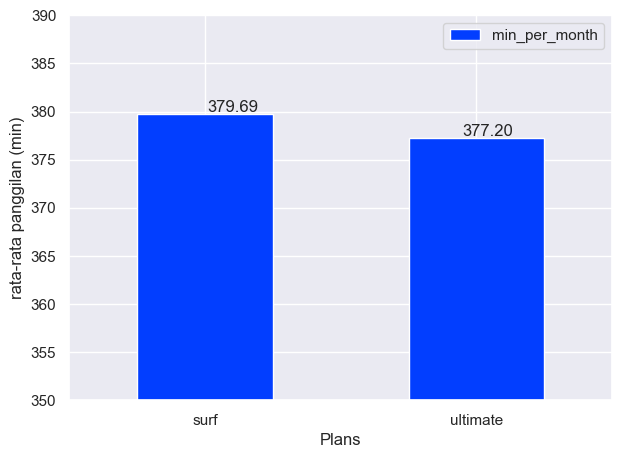

In [40]:
# membandingkan durasi rata-rata panggilan setiap paket per bulannya. 
# kita akan membuat sebuah diagram batang untuk memvisualisasikannya.

# membuat pivot table untuk merangkum rata-rata dataset durasi panggilan berdasarkan jenis paket yang digunakan
package_call = pd.pivot_table(user_usage, index = 'plan', values = 'min_per_month', aggfunc = 'mean')

# membuat bar chart dari pivot table
package_call.plot(kind = 'bar',rot = 0,figsize=(7,5))

# menentukan batas limit sumbu-y
plt.ylim(350,390)

# mendefinisikan label sumbu-x dan sumbu-y
plt.xlabel('Plans')
plt.ylabel('rata-rata panggilan (min)')

# membuat label pada bar chart
plt.text(x=0.01,y=380,s='379.69')
plt.text(x=0.95,y=377.5,s='377.20')

# menampilkan bar chart
plt.show()


Dari grafik diatas terlihat bahwa pengguna `Paket Surf` memiliki durasi panggilan pengguna per bulan yang sedikit lebih tinggi dari pengguna `Paket Ultimate` dengan besar masing-masing rata-rata durasi `379.69 menit (Surf)` dan `377.20 menit (Ultimate)`.

Selanjutnya kita akan melihat distribusi durasi panggilan pengguna per bulan per paketnya menggunagan grafik histogram seperti berikut:

In [41]:
# mengelompokan jenis paket untuk kategori 'min_per_call' untuk jenis paket `surf` dan `ultimate`
surf = user_usage[user_usage['plan'] == 'surf']
ultimate = user_usage[user_usage['plan'] == 'ultimate']

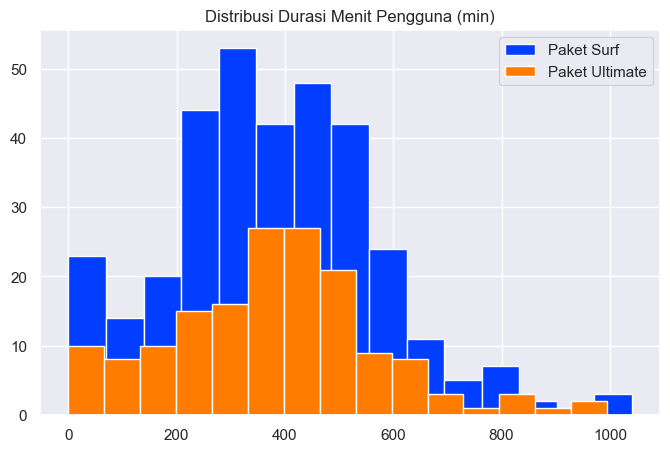

In [42]:
# membandingkan jumlah menit yang dibutuhkan pengguna tiap paket per bulannya. 
# kita akan membuat sebuah histogram.

# membuat histogram dari paket `surf` dan paket 'ultimate'
surf['min_per_month'].hist(bins=15, label = 'Paket Surf',figsize=(8,5))
ultimate['min_per_month'].hist(bins=15, label = 'Paket Ultimate')

# mendefinisikan title histogram
plt.title('Distribusi Durasi Menit Pengguna (min)')

# mendefinisikan letak legend
plt.legend(loc='upper right')

# menampilkan histogram chart
plt.show()

Dari kedua histogram tersebut menunjukan bahwa:
- Untuk `Paket Surf` memiliki distribusi data yang tersebar pada kisaran antara `200 hingga 530 menit` dengan puncak berada pada kisaran `300 menit`.
- Untuk `Paket Ultimate` memiliki distribusi data yang tersebar pada kisaran antara `370 hingga 430 menit` dengan puncak berada pada kisaran `400 menit`.
- Pemakaian fitur `panggilan` untuk paket `surf` lebih sering digunakan daripada paket `ultimate`

In [43]:
# menghitung rata-rata dan varians dari durasi panggilan bulanan

# menghitung rata-rata 
mean_surf_calls = surf['min_per_month'].mean()
mean_ultimate_calls = ultimate['min_per_month'].mean()

# menampilkan output
print('Rata-rata Durasi Panggilan Pengguna Paket Surf\t   :',f'{mean_surf_calls:.2f}','menit')
print('Rata-rata Durasi Panggilan Pengguna Paket Ultimate :',f'{mean_ultimate_calls:.2f}','menit')

Rata-rata Durasi Panggilan Pengguna Paket Surf	   : 379.69 menit
Rata-rata Durasi Panggilan Pengguna Paket Ultimate : 377.20 menit


In [44]:
# menghitung varians
varians_surf_calls = np.var(surf[['min_per_month']])
varians_ultimate_calls = np.var(ultimate[['min_per_month']])

# ekstraksi value dari varians
tmp_surf = varians_surf_calls['min_per_month']
tmp_ultimate = varians_ultimate_calls['min_per_month']

# menampilkan output
print('Varians Durasi Panggilan Pengguna Paket Surf\t :',f'{tmp_surf:.2f}','menit kuadrat')
print('Varians Durasi Panggilan Pengguna Paket Ultimate :',f'{tmp_ultimate:.2f}','menit kuadrat')

Varians Durasi Panggilan Pengguna Paket Surf	 : 37357.58 menit kuadrat
Varians Durasi Panggilan Pengguna Paket Ultimate : 38073.64 menit kuadrat


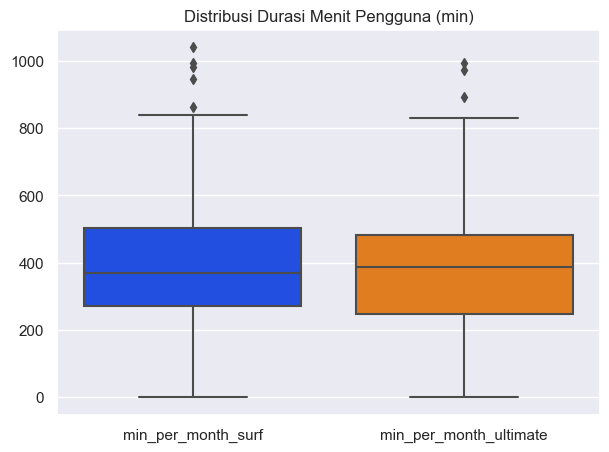

In [45]:
# membuat grafik boxplot untuk memvisualisasikan distribusi durasi panggilan bulanan

# menggabungkan dua dataframe `surf` dan `ultimate` kedalam satu dataframe menggunakan metode join
merging_package = surf.join(ultimate,how='outer',lsuffix='_surf', rsuffix='_ultimate')

# menampilkan boxplot durasi waktu berdasarkan paket-paketnya
plt.figure(figsize=(7,5))
sns.boxplot(data=merging_package[['min_per_month_surf','min_per_month_ultimate']])

# mendefinisikan title histogram
plt.title('Distribusi Durasi Menit Pengguna (min)')

# menampilkan boxplot
plt.show()

Dari analisis rata-rata, varians dan visualisasi boxplot untuk masing-masing paket data terlihat bahwa prilaku pengguna terhadap `durasi panggilan` pada `Paket Surf` memiliki prilaku yang `hampir sama` dengan prilaku `Paket Ultimate` namun prilaku `Paket Surf` lebih mengungguli daripada `Paket Ultimate`.

### Pesan/SMS <a id= 'cont_21' ></a>

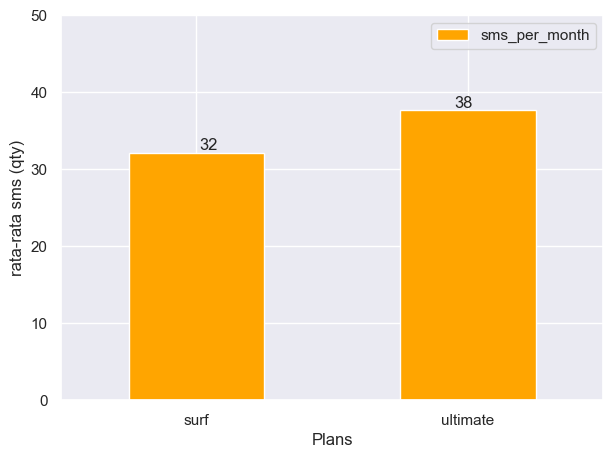

In [46]:
# membandingkan jumlah SMS yang cenderung dikirim pengguna tiap paket per bulannya

# membuat pivot table untuk merangkum rata-rata dataset jumlah sms berdasarkan jenis paket yang digunakan
package_sms = pd.pivot_table(user_usage, index = 'plan', values = 'sms_per_month', aggfunc = 'mean')

# membuat bar chart dari pivot table
package_sms.plot(kind = 'bar',rot = 0,figsize=(7,5),color='orange')

# menentukan batas limit sumbu-y
plt.ylim(0,50)

# mendefinisikan label sumbu-x dan sumbu-y
plt.xlabel('Plans')
plt.ylabel('rata-rata sms (qty)')

# membuat label pada bar chart
plt.text(x=0.01,y=32.5,s='32')
plt.text(x=0.95,y=38,s='38')

# menampilkan bar chart
plt.show()

Dari grafik diatas terlihat bahwa pengguna `Paket Ultimate` memiliki jumlah sms pengguna per bulan yang lebih tinggi dari pengguna `Paket Surf` dengan besar masing-masing rata-rata jumlah sms `32 qty (Surf)` dan `38 qty (Ultimate)`.

Selanjutnya kita akan melihat distribusi jumlah sms pengguna per bulan per paketnya menggunagan grafik histogram seperti berikut:

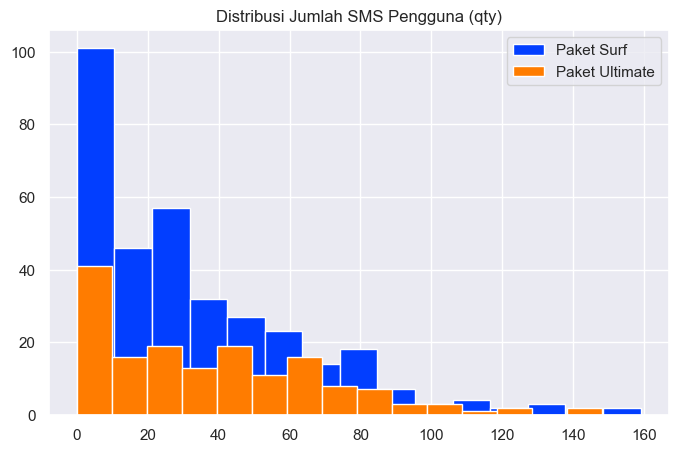

In [47]:
# membandingkan jumlah sms yang dibutuhkan pengguna tiap paket per bulannya. 
# kita akan membuat sebuah histogram.

# membuat histogram dari paket `surf` dan paket 'ultimate'
surf['sms_per_month'].hist(bins=15, label = 'Paket Surf',figsize=(8,5))
ultimate['sms_per_month'].hist(bins=15, label = 'Paket Ultimate')

# mendefinisikan title histogram
plt.title('Distribusi Jumlah SMS Pengguna (qty)')

# mendefinisikan letak legend
plt.legend(loc='upper right')

# menampilkan histogram chart
plt.show()

Dari kedua histogram tersebut menunjukan bahwa:
- Untuk `Paket Surf` dan `Paket Ultimate` memiliki distribusi jumlah sms yang tersebar pada kisaran antara `0 hingga 30 qty` dengan puncak berada pada kisaran `5 qty`.
- Kedua histogram menunjukan bahwa tidak banyak pengguna yang sering menggunakan `SMS` dimana grafik landai ke kanan.
- Pemakaian fitur `sms` untuk paket `surf` lebih sering digunakan daripada paket `ultimate`

In [48]:
# menghitung rata-rata dan varians dari jumlah sms bulanan

# menghitung rata-rata 
mean_surf_sms = surf['sms_per_month'].mean()
mean_ultimate_sms = ultimate['sms_per_month'].mean()

# menampilkan output
print('Rata-rata SMS Pengguna Paket Surf     :',f'{mean_surf_sms:.2f}','sms')
print('Rata-rata SMS Pengguna Paket Ultimate :',f'{mean_ultimate_sms:.2f}','sms')

Rata-rata SMS Pengguna Paket Surf     : 32.11 sms
Rata-rata SMS Pengguna Paket Ultimate : 37.70 sms


In [49]:
# menghitung varians
varians_surf_sms = np.var(surf[['sms_per_month']])
varians_ultimate_sms = np.var(ultimate[['sms_per_month']])

# ekstraksi value dari varians
tmp_surf = varians_surf_sms['sms_per_month']
tmp_ultimate = varians_ultimate_sms['sms_per_month']

# menampilkan output
print('Varians SMS Pengguna Paket Surf     :',f'{tmp_surf:.2f}','qty kuadrat')
print('Varians SMS Pengguna Paket Ultimate :',f'{tmp_ultimate:.2f}','qty kuadrat')

Varians SMS Pengguna Paket Surf     : 963.40 qty kuadrat
Varians SMS Pengguna Paket Ultimate : 1086.56 qty kuadrat


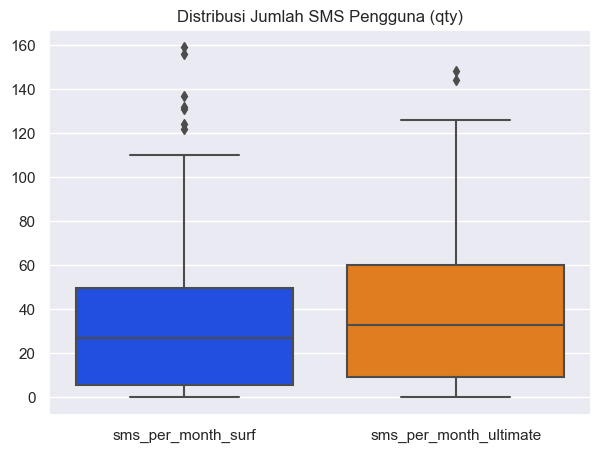

In [50]:
# membuat grafik boxplot untuk memvisualisasikan distribusi jumlah sms bulanan

# menampilkan boxplot jumlah sms berdasarkan paket-paketnya
plt.figure(figsize=(7,5))
sns.boxplot(data=merging_package[['sms_per_month_surf','sms_per_month_ultimate']])

# mendefinisikan title boxplot
plt.title('Distribusi Jumlah SMS Pengguna (qty)')

# menampilkan boxplot
plt.show()

Dari analisis rata-rata, varians dan visualisasi boxplot untuk masing-masing paket data terlihat bahwa prilaku pengguna terhadap `jumlah sms` pada `Paket Surf` memiliki prilaku yang `berbeda` dengan prilaku `Paket Ultimate` dimana distribusi datanya berada ditempat yang berbeda. `Paket Ultimate` memiliki nilai yang lebih tinggi jika dibandingkan dengan `Paket Surf`.

### Internet <a id= 'cont_22' ></a>

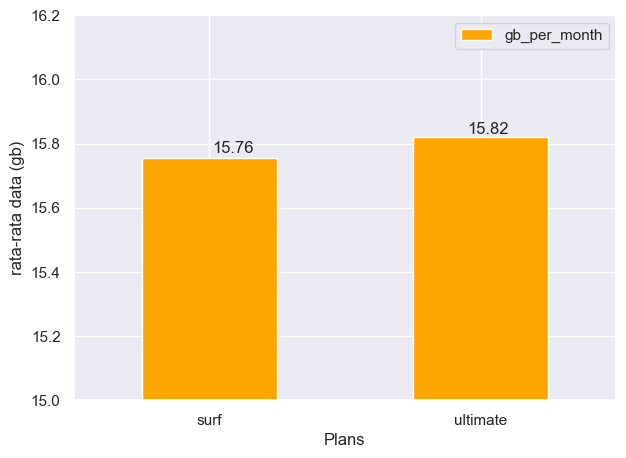

In [67]:
# membandingkan jumlah data yang cenderung dikirim pengguna tiap paket per bulannya

# membuat pivot table untuk merangkum rata-rata dataset jumlah data berdasarkan jenis paket yang digunakan
package_internet = pd.pivot_table(user_usage, index = 'plan', values = 'gb_per_month', aggfunc = 'mean')

# membuat bar chart dari pivot table
package_internet.plot(kind = 'bar',rot = 0,figsize=(7,5),color='orange')

# menentukan batas limit sumbu-y
plt.ylim(15,16.2)

# mendefinisikan label sumbu-x dan sumbu-y
plt.xlabel('Plans')
plt.ylabel('rata-rata data (gb)')

# membuat label pada bar chart
plt.text(x=0.01,y=15.77,s='15.76')
plt.text(x=0.95,y=15.83,s='15.82')

# menampilkan bar chart
plt.show()

Dari grafik diatas terlihat bahwa pengguna `Paket Ultimate` memiliki jumlah data internet pengguna per bulan yang sedikit lebih tinggi dari pengguna `Paket Surf` dengan besar masing-masing rata-rata jumlah data internet `15.76 Gb (Surf)` dan `15.82 Gb (Ultimate)`.

Selanjutnya kita akan melihat distribusi jumlah data internet pengguna per bulan per paketnya menggunagan grafik histogram seperti berikut:

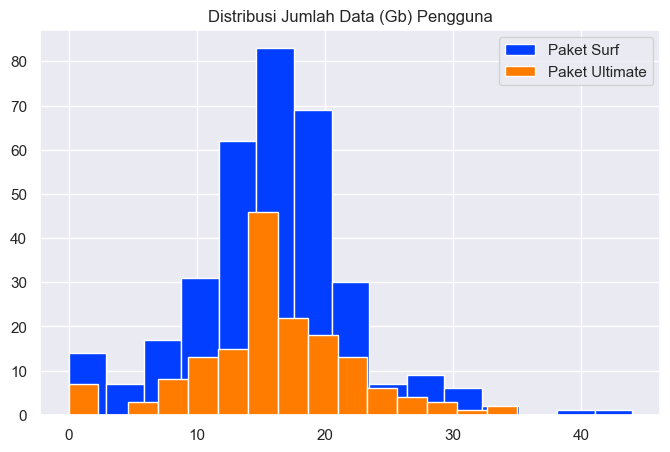

In [52]:
# membandingkan jumlah data yang dibutuhkan pengguna tiap paket per bulannya. 
# kita akan membuat sebuah histogram.

# membuat histogram dari paket `surf` dan paket 'ultimate'
surf['gb_per_month'].hist(bins=15, label = 'Paket Surf', figsize=(8,5))
ultimate['gb_per_month'].hist(bins=15, label = 'Paket Ultimate')

# mendefinisikan title histogram
plt.title('Distribusi Jumlah Data (Gb) Pengguna')

# mendefinisikan letak legend
plt.legend(loc='upper right')

# menampilkan histogram chart
plt.show()

Dari kedua histogram tersebut menunjukan bahwa:
- Untuk `Paket Surf` memiliki distribusi data yang tersebar pada kisaran antara `12 hingga 20.5 Gb` dengan puncak berada pada kisaran `15 Gb`.
- Untuk `Paket Ultimate` memiliki distribusi data yang tersebar pada kisaran antara `14 hingga 21 Gb` dengan puncak berada pada kisaran `15 Gb`.
- Pemakaian fitur `Jumlah Data Internet` untuk paket `surf` lebih sering digunakan daripada paket `ultimate`

In [53]:
# menghitung rata-rata dan varians dari jumlah data (gb) bulanan

# menghitung rata-rata 
mean_surf_internet = surf['gb_per_month'].mean()
mean_ultimate_internet = ultimate['gb_per_month'].mean()

# menampilkan output
print('Rata-rata Jumlah Data Internet Pengguna Paket Surf     :',f'{mean_surf_internet:.2f}','gb')
print('Rata-rata Jumlah Data Internet Pengguna Paket Ultimate :',f'{mean_ultimate_internet:.2f}','gb')

Rata-rata Jumlah Data Internet Pengguna Paket Surf     : 15.76 gb
Rata-rata Jumlah Data Internet Pengguna Paket Ultimate : 15.82 gb


In [54]:
# menghitung varians
varians_surf_gb = np.var(surf[['gb_per_month']])
varians_ultimate_gb = np.var(ultimate[['gb_per_month']])

# ekstraksi value dari varians
tmp_surf = varians_surf_gb['gb_per_month']
tmp_ultimate = varians_ultimate_gb['gb_per_month']

# menampilkan output
print('Varians Jumlah Data Internet Pengguna Paket Surf     :',f'{tmp_surf:.2f}','gb kuadrat')
print('Varians Jumlah Data Internet Pengguna Paket Ultimate :',f'{tmp_ultimate:.2f}','gb kuadrat')

Varians Jumlah Data Internet Pengguna Paket Surf     : 40.72 gb kuadrat
Varians Jumlah Data Internet Pengguna Paket Ultimate : 38.64 gb kuadrat


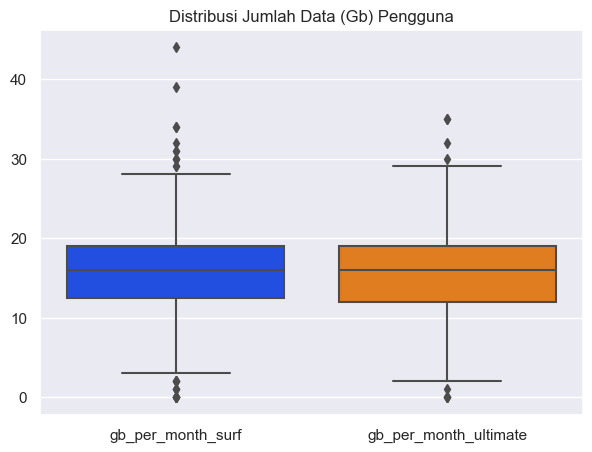

In [55]:
# membuat grafik boxplot untuk memvisualisasikan distribusi jumlah data (gb) bulanan

# menampilkan boxplot jumlah sms berdasarkan paket-paketnya
plt.figure(figsize=(7,5))
sns.boxplot(data=merging_package[['gb_per_month_surf','gb_per_month_ultimate']])

# mendefinisikan title boxplot
plt.title('Distribusi Jumlah Data (Gb) Pengguna')

# menampilkan boxplot
plt.show()

Dari analisis rata-rata, varians dan visualisasi boxplot untuk masing-masing paket data terlihat bahwa prilaku pengguna terhadap `jumlah data internet` pada `Paket Surf` memiliki prilaku yang sedikit `berbeda` dengan prilaku `Paket Ultimate` dimana distribusi datanya berada ditempat yang sedikit berbeda. `Paket Ultimate` memiliki nilai yang lebih tinggi jika dibandingkan dengan `Paket Surf`.

## Pendapatan <a id= 'cont_23' ></a>

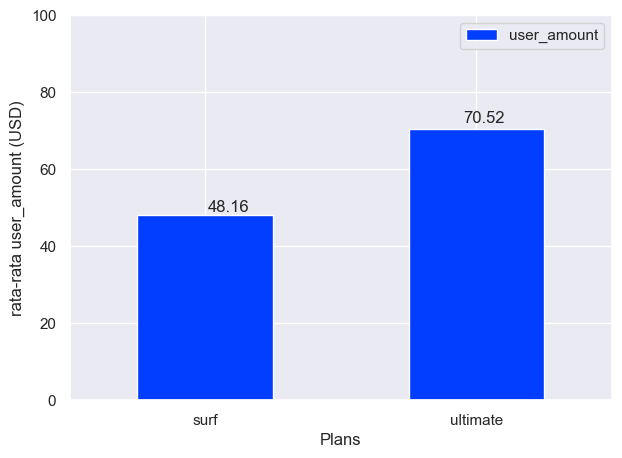

In [56]:
# membandingkan jumlah pendapatan dari pengguna tiap paket per bulannya

# membuat pivot table untuk merangkum rata-rata dataset jumlah pendapatan berdasarkan jenis paket yang digunakan
package_amount = pd.pivot_table(user_usage, index = 'plan', values = 'user_amount', aggfunc = 'mean')

# membuat bar chart dari pivot table
package_amount.plot(kind = 'bar',rot = 0, figsize=(7,5))

# menentukan batas limit sumbu-y
plt.ylim(0,100)

# mendefinisikan label sumbu-x dan sumbu-y
plt.xlabel('Plans')
plt.ylabel('rata-rata user_amount (USD)')

# membuat label pada bar chart
plt.text(x=0.01,y=49,s='48.16')
plt.text(x=0.95,y=72,s='70.52')

# menampilkan bar chart
plt.show()

Dari grafik diatas terlihat bahwa pengguna `Paket Ultimate` memberikan jumlah pendapatan dari pengguna per bulan yang lebih tinggi dari pengguna `Paket Surf` dengan besar masing-masing rata-rata jumlah pendapatan `48.16 USD (Surf)` dan `70.52 USD (Ultimate)`.

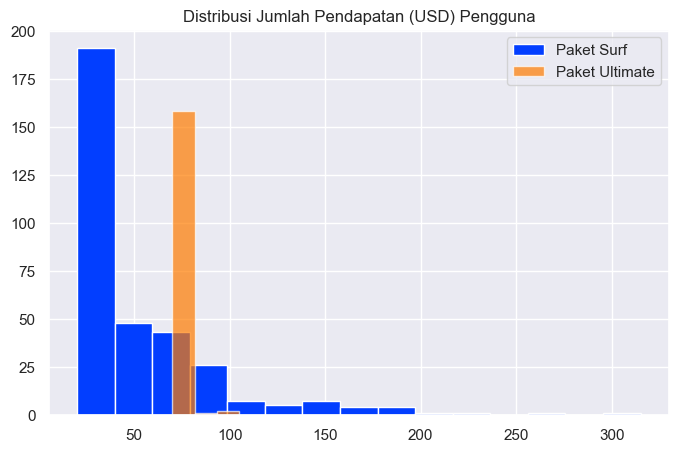

In [57]:
# membandingkan jumlah pendapatan dari pengguna tiap paket per bulannya. 
# kita akan membuat sebuah histogram.

# membuat histogram dari paket `surf` dan paket 'ultimate'
surf['user_amount'].hist(bins=15, label = 'Paket Surf',figsize=(8,5))
ultimate['user_amount'].hist(bins=3, label = 'Paket Ultimate', alpha = 0.7)

# mendefinisikan title histogram
plt.title('Distribusi Jumlah Pendapatan (USD) Pengguna')

# mendefinisikan letak legend
plt.legend(loc='upper right')

# menampilkan histogram chart
plt.show()

Dari kedua histogram tersebut menunjukan bahwa:
- Untuk `Paket Surf` memiliki distribusi data yang tersebar pada kisaran antara `23 hingga 75 USD` dengan puncak berada pada kisaran `25 USD`.
- Untuk `Paket Ultimate` memiliki distribusi data yang terpusat pada kisaran `70 USD`.
- Pemakaian `Jenis Paket` untuk paket `surf` lebih sering digunakan daripada paket `ultimate`
- Kedua grafik memiliki bentuk yang landai kekanan `(Positive Skew)`.

In [58]:
# menghitung rata-rata dan varians dari jumlah pendapatan dari pelanggan bulanan

# menghitung rata-rata 
mean_surf_amount = surf['user_amount'].mean()
mean_ultimate_amount = ultimate['user_amount'].mean()

# menampilkan output
print('Rata-rata Jumlah Pendapatan dari Pengguna Paket Surf     :',f'{mean_surf_amount:.2f}','USD')
print('Rata-rata Jumlah Pendapatan dari Pengguna Paket Ultimate :',f'{mean_ultimate_amount:.2f}','USD')

Rata-rata Jumlah Pendapatan dari Pengguna Paket Surf     : 48.16 USD
Rata-rata Jumlah Pendapatan dari Pengguna Paket Ultimate : 70.52 USD


In [59]:
# menghitung varians
varians_surf_amount = np.var(surf[['user_amount']])
varians_ultimate_amount = np.var(ultimate[['user_amount']])

# ekstraksi value dari varians
tmp_surf = varians_surf_amount['user_amount']
tmp_ultimate = varians_ultimate_amount['user_amount']

# menampilkan output
print('Varians Jumlah Pendapatan dari Pengguna Paket Surf     :',f'{tmp_surf:.2f}','USD kuadrat')
print('Varians Jumlah Pendapatan dari Pengguna Paket Ultimate :',f'{tmp_ultimate:.2f}','USD kuadrat')

Varians Jumlah Pendapatan dari Pengguna Paket Surf     : 1777.84 USD kuadrat
Varians Jumlah Pendapatan dari Pengguna Paket Ultimate : 16.16 USD kuadrat


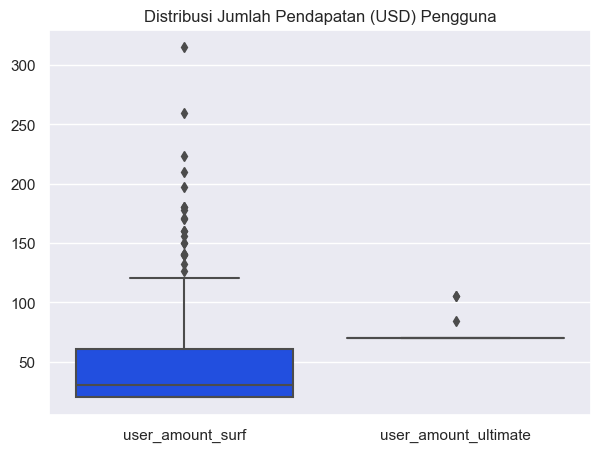

In [60]:
# membuat grafik boxplot untuk memvisualisasikan distribusi jumlah pendapatan dari pelanggan bulanan

# menampilkan boxplot jumlah sms berdasarkan paket-paketnya
plt.figure(figsize=(7,5))
sns.boxplot(data=merging_package[['user_amount_surf','user_amount_ultimate']])

# mendefinisikan title boxplot
plt.title('Distribusi Jumlah Pendapatan (USD) Pengguna')

# menampilkan boxplot
plt.show()

 Dari analisis rata-rata, varians dan visualisasi boxplot untuk masing-masing pendapatan dari pengguna terlihat bahwa pendapatan bulanan dari paket `surf` dan paket `ultimate` memberikan hasil pendapatan yang berbeda yang berbeda dimana pada paket `ultimate` memberikan pendapatan bulanan yang lebih tinggi dibandingkan dengan pendapatan dari paket `surf`.

## Menguji Hipotesis Statistik <a id= 'cont_24' ></a>

### Pengujian Hipotesis 1: Pendapatan Rata-rata dari Pengguna Paket Prabayar Ultimate dan Surf Berbeda <a id= 'cont_25' ></a>

Selanjutnya kita akan menguji suatu hipotesis yang menyatakan bahwa `Pendapatan Rata-rata dari Pengguna Paket Prabayar Ultimate dan Surf Berbeda`. Mari kita rangkum hipotesisnya sebagai berikut:
- Hipotesis Nol: `Pendapatan Rata-rata dari Pengguna Paket Prabayar Ultimate dan Surf Sama`
- Hipotesis Alternatif: `Pendapatan Rata-rata dari Pengguna Paket Prabayar Ultimate dan Surf Berbeda`

Mari kita uji menggunakan library `scipy`.

In [61]:
# menguji hipotesis 1:
# mendefinisikan signifikasi sebesar 5%
alpha = 0.05

# menguji apakah pendapatan pada paket `surf` dan paket `ultimate` memiliki kesamaan menggunakan `ttest_ind`
results = st.ttest_ind(surf['user_amount'],ultimate['user_amount'],equal_var=False)

# menampilkan p-value
print('p-value',results.pvalue)

# pengujian hipotesis
if results.pvalue < alpha:
    # hipotesis alternatif = "Pendapatan Rata-rata dari Pengguna Paket Prabayar Ultimate dan Surf Berbeda" 
    print('Kita menolak hipotesis nol')
else:
    # hipotesis nol = "Pendapatan Rata-rata dari Pengguna Paket Prabayar Ultimate dan Surf Sama"
    print('Kita tidak dapat menolak hipotesis nol')

p-value 9.973982812516387e-20
Kita menolak hipotesis nol


Dari hasil pengujian hipotesis menunjukan `'Penolakan terhadap Hipotesis Nol'` dimana `'Hipotesis Alternatif yang Disetujui'` yang berarti bahwa `"Pendapatan Rata-rata dari Pengguna Paket Prabayar Ultimate dan Surf Berbeda"`. Hal ini sesuai dengan analisis pendapatan dari pengguna pada pembahasan sebelumnya bahwa `'Pendapatan dari Paket Ultimate Lebih Besar dari Paket Surf'`.

### Pengujian Hipotesis 2: Pendapatan Rata-rata dari Pengguna di Wilayah NY-NJ Berbeda dengan Pendapatan Pengguna dari Wilayah Lain <a id= 'cont_26' ></a>

Selanjutnya kita akan menguji suatu hipotesis yang menyatakan bahwa `Pendapatan Rata-rata dari Pengguna di Wilayah NY-NJ Berbeda dengan Pendapatan Pengguna dari Wilayah Lain`. Mari kita rangkum hipotesisnya sebagai berikut:
- Hipotesis Nol: `Pendapatan Rata-rata dari Pengguna di Wilayah NY-NJ dengan Wilayah Lain adalah Sama`
- Hipotesis Alternatif: `Pendapatan Rata-rata dari Pengguna di Wilayah NY-NJ dengan Wilayah Lain adalah Berbeda`

Mari kita uji menggunakan library `scipy`.

In [62]:
# membuat filter pendapatan berdasarkan region 'NY-NJ' dengan region 'other'
ny_nj_amount = user_usage[user_usage['region'] == 'NY-NJ']
other_amount = user_usage[user_usage['region'] == 'other']

In [63]:
# menguji hipotesis 2:
# mendefinisikan signifikasi sebesar 5%
alpha = 0.05

# menguji apakah pendapatan pada region `NY-NJ` dan region `Other` memiliki kesamaan menggunakan `ttest_ind`
results = st.ttest_ind(ny_nj_amount['user_amount'],other_amount['user_amount'],equal_var=False)

# menampilkan p-value
print('p-value',results.pvalue)

# pengujian hipotesis
if results.pvalue < alpha:
    # hipotesis alternatif = "Pendapatan Rata-rata dari Pengguna di Wilayah NY-NJ dengan Wilayah Lain adalah Berbeda" 
    print('Kita menolak hipotesis nol')
else:
    # hipotesis nol = "Pendapatan Rata-rata dari Pengguna di Wilayah NY-NJ dengan Wilayah Lain adalah Sama"
    print('Kita tidak dapat menolak hipotesis nol')

p-value 0.4268835575367236
Kita tidak dapat menolak hipotesis nol


Dari hasil pengujian hipotesis menunjukan `'Kita tidak dapat menolak Hipotesis Nol'` dimana `'Hipotesis Alternatif yang Ditolak'` yang berarti bahwa `"Pendapatan Rata-rata dari Pengguna di Wilayah NY-NJ dengan Wilayah Lain adalah Sama"`.

## Kesimpulan Umum <a id= 'cont_27' ></a>

Untuk mengetahui Paket Prabayar manakah yang lebih baik (lebih menguntungkan) diperlukan beberapa analisis mulai dari persiapan data hingga analisis itu sendiri. Jika memungkinkan diperlukan uji hipotesis seperti yang dilakukan pada projek ini. Tahap persiapan dimulai dari pengecekan beberapa sampel data pada masing-masing dataframe. `Megaline` memiliki beberapa dataframe diantaranya `'calls'`, `'internet'`, `'messages'`, `'plans'` dan `'users'`yang semuanya memiliki informasi yang penting untuk analisis projek ini.

Tahap pertama pemrosesan data yaitu mengecek `tipe data` apakah sudah sesuai dengan yang diharapkan, kemudian dilanjutkan dengan mengecek `nilai yang hilang dan mengatasinya`, `mengecek duplikasi data` dan memperkaya data dengan memisahkan `datetime` menjadi kolom masing-masing yaitu `tanggal`, `bulan` dan `tahun`.

Setelah proses `cleanup data` dilanjutkan dengan `agregasi data` untuk memudahkan analisis, kemudian analisis prilaku pengguna berdasarkan kategori `(durasi telepon, jumlah sms, jumlah data internet dan jumlah pendapatan)` dilakukan mulai dari membuat `histogram` dan `boxplot`. Kemudian dilanjutkan pengujian hipotesis seperti pengujian terhadap kesamaan data diantara paket prabayar tersebut dan terakhir penarikan kesimpulan.

Berikut ini beberapa kesimpulan yang diperoleh dari analisis paket prabayar diantaranya:
- Pada prilaku `durasi panggilan` pengguna dimana `Paket Prabayar Surf` lebih mengungguli dalam rata-rata durasi panggilan sebesar `379.69 mins` yang tersebar pada antara `200 hingga 530 menit` dibandingkan dengan `Paket Prabayar Ultimate` sebesar `377.20 mins` yang tersebar antara `370 hingga 430 menit`.
- Pada prilaku `jumlah sms` pengguna dimana `Paket Prabayar Ultimate` lebih mengungguli dalam rata-rata jumlah sms sebesar `38 qty` dibandingkan dengan `Paket Prabayar Surf` sebesar `32 qty` yang kedua paket tersebut memiliki distribusi data disekitar `0 hingga 30 qty`.
- Pada prilaku `jumlah data internet` pengguna dimana `Paket Prabayar Ultimate` dan `Paket Prabayar Surf` hampir memiliki jumlah penggunaan rata-rata data yang sama, namun `Paket Prabayar Ultimate` lebih mengungguli sedikit dalam rata-rata jumlah penggunaan data sebesar `15.82 Gb` yang tersebar pada antara `14 hingga 21 Gb` dibandingkan dengan `Paket Prabayar Surf` sebesar `15.76 Gb` yang tersebar antara `12 hingga 20.5 Gb`.
- Pada prilaku `jumlah pendapatan per bulan` dari pengguna dimana `Paket Prabayar Ultimate` lebih mengungguli dalam rata-rata jumlah pendapatan per bulan sebesar `70.52 USD` yang tersebar pada kisaran `70 USD` dibandingkan dengan `Paket Prabayar Surf` sebesar `48.16 USD` yang memiliki distribusi data disekitar `23 hingga 75 USD`.
- Pengujian hipotesis pertama `"Pendapatan Rata-rata dari Pengguna Paket Prabayar Ultimate dan Surf Berbeda"` menunjukan bahwa hipotesis nol: `"Pendapatan Rata-rata dari Pengguna Paket Prabayar Ultimate dan Surf Sama"` ditolak, sehingga hipotesis alternatif: `"Pendapatan Rata-rata dari Pengguna Paket Prabayar Ultimate dan Surf Berbeda"` yang diterima.
- Pengujian hipotesis kedua `"Pendapatan Rata-rata dari Pengguna di Wilayah NY-NJ dengan Wilayah Lain adalah Berbeda"` menunjukan bahwa hipotesis nol: `"Pendapatan Rata-rata dari Pengguna di Wilayah NY-NJ dengan Wilayah Lain adalah Sama"` tidak dapat ditolak, sehingga hipotesis alternatif: `"Pendapatan Rata-rata dari Pengguna di Wilayah NY-NJ dengan Wilayah Lain adalah Berbeda"` ditolak.

Dari uraian diatas menunjukan bahwa `Paket Prabayar Ultimate` lebih memberikan `"Pendapatan Lebih Banyak"` dan juga banyak peminatan pengguna terutama `jumlah sms` dan `paket data`.